In [1]:
pip install sentinelsat

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install rasterio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI
import rasterio
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask

In [4]:
m = folium.Map([20.845793, -156.477586], zoom_start=11)
#boundary = gpd.read_file(r'#path to the geojson file')

boundary ={
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          [
            -156.51962944007252,
            20.783406014848623
          ],
          [
            -156.681543365039,
            20.90908483496426
          ],
          [
            -156.62400370575338,
            21.01217538940992
          ],
          [
            -156.45673725434176,
            20.8890832963843
          ],
          [
            -156.28947080293005,
            20.917209698251085
          ],
          [
            -156.1196714077829,
            20.81733438935653
          ],
          [
            -156.03855310700868,
            20.701753248027558
          ],
          [
            -156.21786274292188,
            20.624752160051372
          ],
          [
            -156.3523449698569,
            20.60095532144014
          ],
          [
            -156.42713943974408,
            20.653667787992305
          ],
          [
            -156.44587328230207,
            20.793215970350857
          ],
          [
            -156.50207480997645,
            20.824487128946217
          ],
          [
            -156.52013958672896,
            20.783207830157963
          ],
          [
            -156.52482304736844,
            20.786335445258146
          ]
        ],
        "type": "LineString"
      }
    }
  ]
}

folium.GeoJson(boundary).add_to(m)
m

In [5]:
from sentinelsat import SentinelAPI, geojson_to_wkt
from datetime import date
footprint = geojson_to_wkt(boundary)
start_date = date(2023, 8, 10)
end_date = date(2023, 8, 25)

username = 'hparikh'
password = 'Harsh@1102'

api = SentinelAPI(username, password, 'https://scihub.copernicus.eu/dhus')

# Query for Sentinel-1 SLC products within the specified date range
products = api.query(footprint,
                     date=(start_date, end_date),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))



In [ ]:
api.download_all(products)


Fetching archival status:  64%|######3   | 7/11 [00:02<00:01,  3.44product/s]

LTA retrieval:   0%|          | 0/10 [00:00<?, ?product/s]

There was an error downloading S2A_MSIL2A_20230823T210931_N0509_R057_T04QGJ_20230824T014259
Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sentinelsat\sentinel.py", line 1023, in _check_scihub_response
    response.raise_for_status()
  File "C:\anaconda\lib\site-packages\requests\models.py", line 960, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 504 Server Error: Gateway Time-out for url: https://scihub.copernicus.eu/dhus/odata/v1/Products('b1d491ea-567c-4d7c-935a-f2651b2b8b53')/$value

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\anaconda\lib\site-packages\sentinelsat\download.py", line 700, in _download_online_retry
    return self.download(uuid, directory, stop_event=stop_event)
  File "C:\anaconda\lib\site-packages\sentinelsat\download.py", line 150, in download
    self._download_common(product_info, path, stop_event)
  File "C:\a

In [ ]:
gdf = api.to_geodataframe(products)


In [ ]:
gdf = api.to_geodataframe(products)
gdf_sorted = gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
d076fb74-f0c5-4481-9125-6c39baceef62,S2A_MSIL2A_20230813T210931_N0509_R057_T04QGH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-13T21:09:31.024Z, Instrument: MS...",false,2023-08-14 01:01:29,2023-08-13 21:09:31.024,2023-08-13 21:09:31.024,2023-08-14 02:29:30.580,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230814T010129_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230814T010129_A0425...,S2A_MSIL2A_20230813T210931_N0509_R057_T04QGH_2...,d076fb74-f0c5-4481-9125-6c39baceef62,"MULTIPOLYGON (((-156.03442 20.27659, -156.0249..."
7b8a48b9-1d02-4261-82c9-311542836b33,S2B_MSIL2A_20230818T210929_N0509_R057_T04QGH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-18T21:09:29.024Z, Instrument: MS...",false,2023-08-19 00:12:51,2023-08-18 21:09:29.024,2023-08-18 21:09:29.024,2023-08-19 02:23:57.733,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230819T001251_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230819T001251_A0336...,S2B_MSIL2A_20230818T210929_N0509_R057_T04QGH_2...,7b8a48b9-1d02-4261-82c9-311542836b33,"MULTIPOLYGON (((-156.04381 19.78359, -156.0249..."
37a88fdc-1410-41b4-b460-41296fe45e35,S2A_MSIL2A_20230813T210931_N0509_R057_T04QGJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-13T21:09:31.024Z, Instrument: MS...",false,2023-08-14 01:01:29,2023-08-13 21:09:31.024,2023-08-13 21:09:31.024,2023-08-14 02:24:33.988,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230814T010129_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230814T010129_A0425...,S2A_MSIL2A_20230813T210931_N0509_R057_T04QGJ_2...,37a88fdc-1410-41b4-b460-41296fe45e35,"MULTIPOLYGON (((-156.02669 20.68566, -156.0087..."
4d3d7c6d-d564-40a1-bd9a-1c92f5301e1e,S2A_MSIL2A_20230823T210931_N0509_R057_T04QGH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-23T21:09:31.024Z, Instrument: MS...",false,2023-08-24 01:42:59,2023-08-23 21:09:31.024,2023-08-23 21:09:31.024,2023-08-24 04:07:04.759,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230824T014259_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230824T014259_A0426...,S2A_MSIL2A_20230823T210931_N0509_R057_T04QGH_2...,4d3d7c6d-d564-40a1-bd9a-1c92f5301e1e,"MULTIPOLYGON (((-156.04381 19.78359, -156.0249..."
87c7b1c9-ee4b-44b5-812b-b43e43e790e2,S2A_MSIL2A_20230823T210931_N0509_R057_T04QHH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-23T21:09:31.024Z, Instrument: MS...",false,2023-08-24 01:42:59,2023-08-23 21:09:31.024,2023-08-23 21:09:31.024,2023-08-24 04:04:37.609,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230824T014259_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230824T014259_A0426...,S2A_MSIL2A_20230823T210931_N0509_R057_T04QHH_2...,87c7b1c9-ee4b-44b5-812b-b43e43e790e2,"MULTIPOLYGON (((-155.46478 19.77237, -155.4464..."
b799a8e9-91c7-4acb-b9a2-95abad9a2609,S2B_MSIL2A_20230818T210929_N0509_R057_T04QGJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-08-18T21:09:29.024Z, Instrument: MS...",false,2023-08-19 00:12:51,2023-08-18 21:09:29.

In [ ]:
import zipfile

zip_file_path = 'C:/Users/Mihir Trivedi/Downloads/S1A_EW_GRDM_1SDV_20231011T071920_20231011T072020_050714_061C5E_874A.zip'
output_folder = 'C:/Users/Mihir Trivedi/Desktop/final code'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)


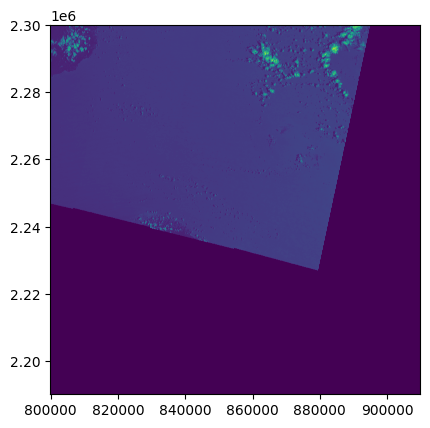

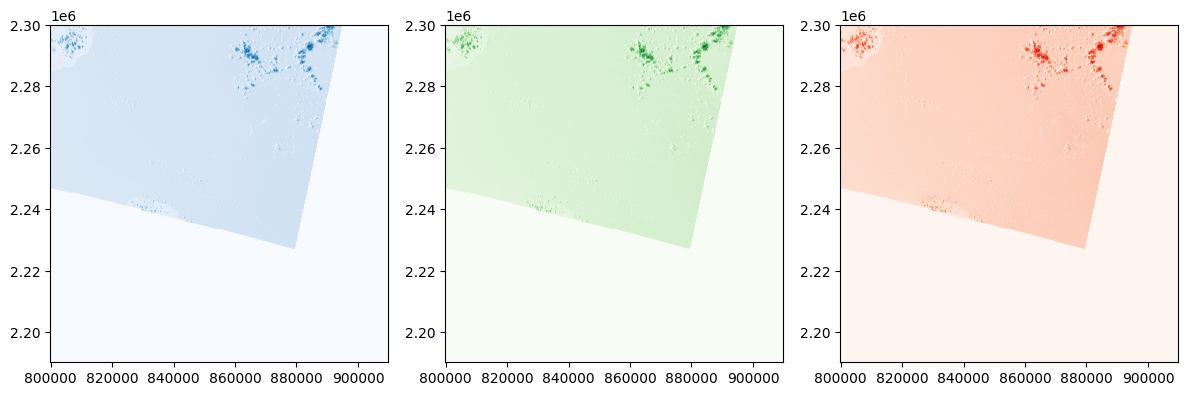

In [ ]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline
#import bands as separate 1 band raster
imagePath = '../Sentinel2/GRANULE/L1C_T11SKB_A007675_20180825T184430/IMG_DATA/'
band2 = rasterio.open('/content/folder/S2A_MSIL2A_20230813T210931_N0509_R057_T04QHH_20230814T010129.SAFE/GRANULE/L2A_T04QHH_A042525_20230813T210927/IMG_DATA/R10m/T04QHH_20230813T210931_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open('/content/folder/S2A_MSIL2A_20230813T210931_N0509_R057_T04QHH_20230814T010129.SAFE/GRANULE/L2A_T04QHH_A042525_20230813T210927/IMG_DATA/R10m/T04QHH_20230813T210931_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open('/content/folder/S2A_MSIL2A_20230813T210931_N0509_R057_T04QHH_20230814T010129.SAFE/GRANULE/L2A_T04QHH_A042525_20230813T210927/IMG_DATA/R10m/T04QHH_20230813T210931_B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open('/content/folder/S2A_MSIL2A_20230813T210931_N0509_R057_T04QHH_20230814T010129.SAFE/GRANULE/L2A_T04QHH_A042525_20230813T210927/IMG_DATA/R10m/T04QHH_20230813T210931_B08_10m.jp2', driver='JP2OpenJPEG') #nir
#number of raster bands
band4.count
#number of raster columns
band4.width
#number of raster rows
band4.height
#plot band
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

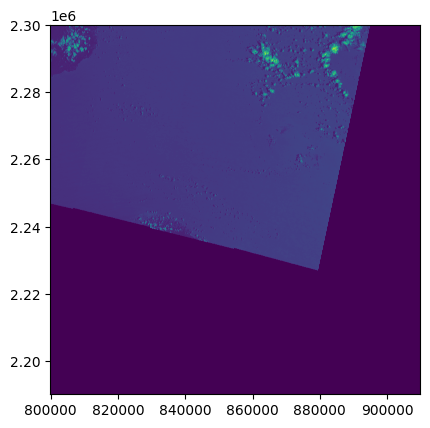

<Axes: >

In [ ]:

#export true color image

trueColor = rasterio.open('/content/folder/SentinelTrueColor2.tiff','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()
src = rasterio.open(r"/content/folder/SentinelTrueColor2.tiff", count=3)
plot.show(src)

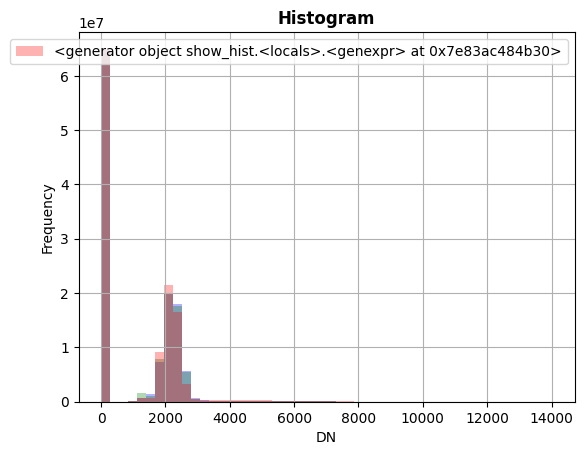

In [ ]:

#export false color image
falseColor = rasterio.open('/content/folder/SentinelTrueColor2.tiff', 'w', driver='Gtiff',
                          width=band2.width, height=band2.height,
                          count=3,
                          crs=band2.crs,
                          transform=band2.transform,
                          dtype='uint16'
                         )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()
#generate histogram
trueColor = rasterio.open('/content/folder/SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")
